# Logistic `Regression Maths`
-----
1.	Logistic regression, despite its name, is a linear model for `classification` rather than regression.
2.	Logistic regression is also known in the literature as `logit regression`, `maximum-entropy classification (MaxEnt)` or the `log-linear classifier`. 
3.	In this model, the probabilities describing the possible outcomes of a single trial are modelled using a `logistic function`.
4.	A logistic function or logistic curve is a common "S" shape (sigmoid curve), with equation

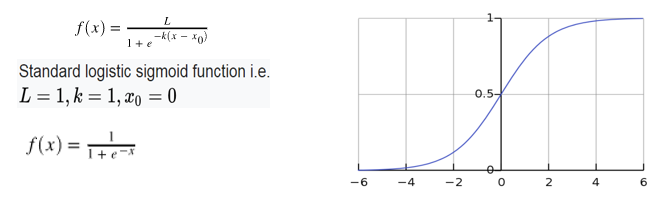

In [1]:
from PIL import Image
Image.open("E:/code/7.MachineLearningOfficial/img/logr1.PNG")

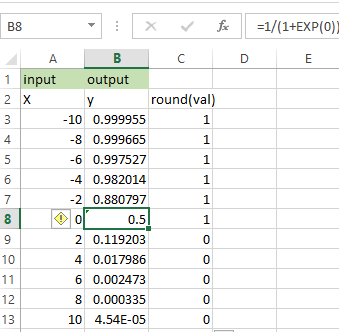

In [2]:
from PIL import Image
Image.open("E:/code/7.MachineLearningOfficial/img/sigmoid1.PNG")

5. Maths behind it, just walk through it. If you are not understand do not be panic

    a.	https://en.wikipedia.org/wiki/Logistic_regression
    
    b.	https://en.wikipedia.org/wiki/Logistic_function
    
    c.  http://scikit-learn.org/dev/modules/linear_model.html#logistic-regression


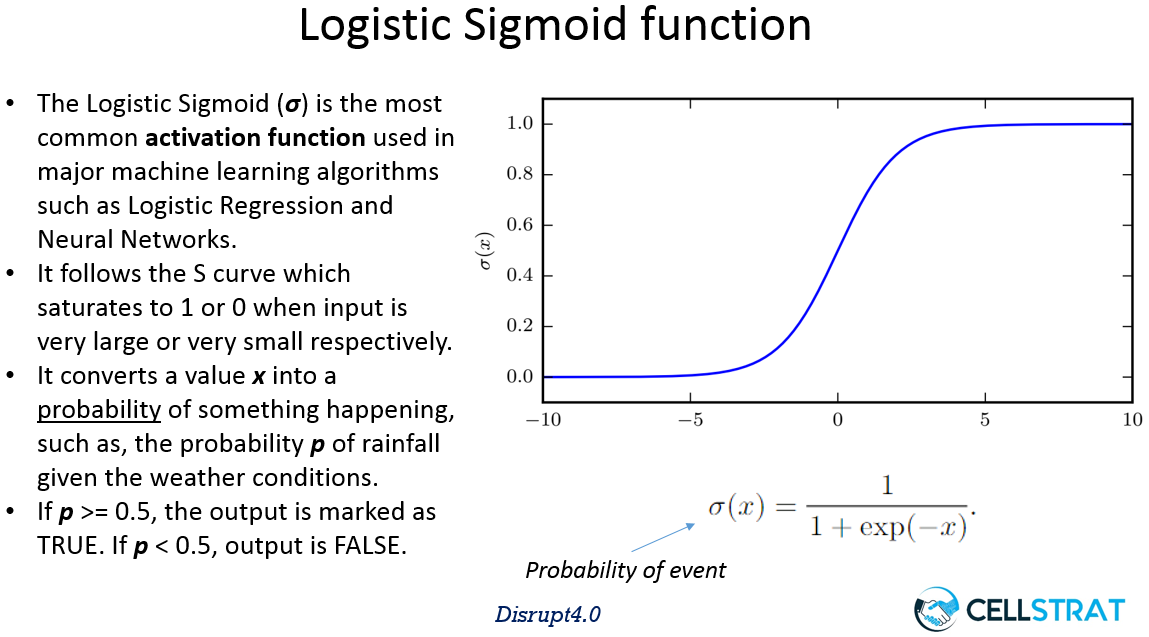

In [3]:
from PIL import Image
Image.open("E:/code/7.MachineLearningOfficial/img/sigmoid.PNG")

* Linear Regression Equation

    $y = \sum_{i=0}^N {b_{i}x_{i}} $

    where $x_{0} =1$

* Logistic Regression Equation
<b>$f(x) =\frac {1}{1+e^{-\sum_{i=0}^N {b_{i}x_{i}}}}$</b>

    where $x_{0} =1$

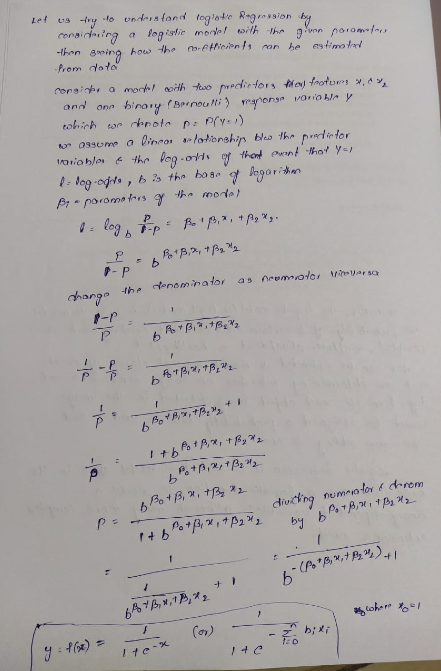

In [4]:
from PIL import Image
Image.open("E:/code/7.MachineLearningOfficial/img/maths.PNG")

#### Probability of passing an exam versus hours of study

#### A group of 20 students spends between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability of the student passing the exam?
- The reason for using logistic regression for this problem is that the values of the dependent variable, pass and fail, while represented by "1" and "0", are not cardinal numbers. If the problem was changed so that pass/fail was replaced with the grade 0–100 (cardinal numbers), then simple regression analysis could be used.

- The table shows the number of hours each student spent studying, and whether they passed (1) or failed (0).

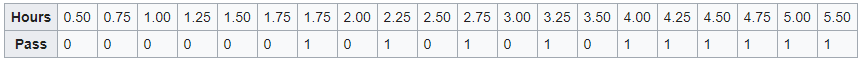

In [5]:
from PIL import Image
Image.open("E:/code/7.MachineLearningOfficial/img/pass.PNG")

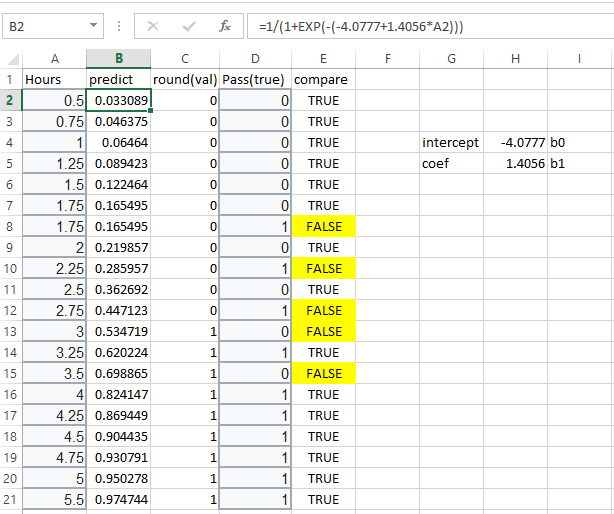

In [6]:
from PIL import Image
Image.open("E:/code/7.MachineLearningOfficial/img/sigmoid2.PNG")

## Logistic `Regression` Binary Clasification

**Business Problem Statement:**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has **diabetes**, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.    

In [7]:
import os

os.chdir("E:/code/7.MachineLearningOfficial/data")
os.getcwd()

'E:\\code\\7.MachineLearningOfficial\\data'

### Step 1: import data

In [8]:
# refer https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd

df = pd.read_csv("pima-indians-diabetes.txt")
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Step 2: preprocessing of data
- Hence the data is balanced so we no need to do preprocessing

### Step 3: identifying the X and y

In [10]:
#X = df[["pregnancies","glucose","diastolic","triceps","insulin","bmi","dpf","age"]]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]                                #df["diabetes"]  

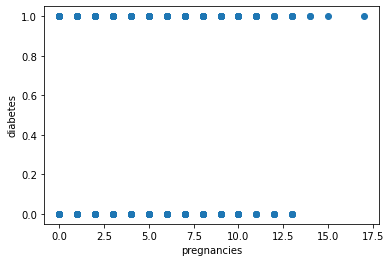

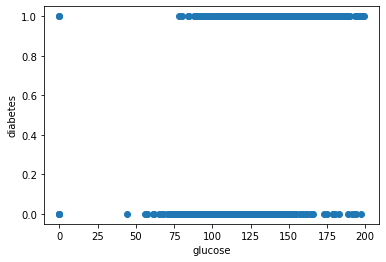

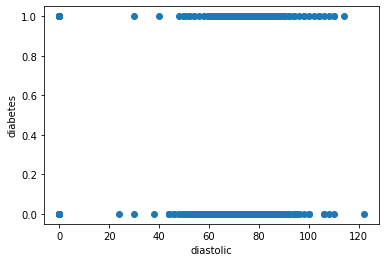

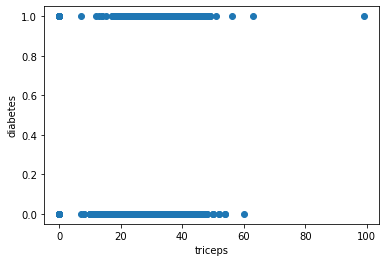

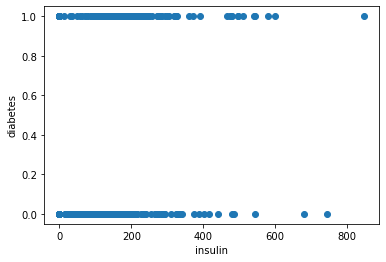

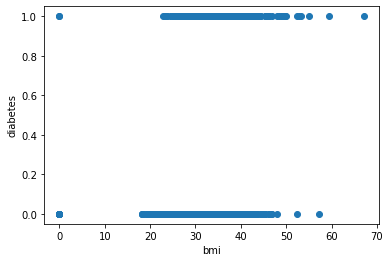

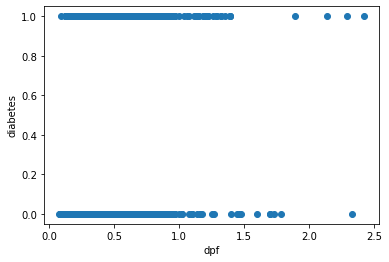

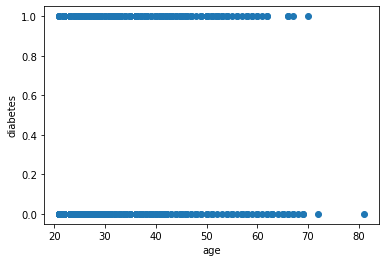

In [12]:
import matplotlib.pyplot as plt

for col in X.columns:
    if col!=['diabetes']:
        plt.scatter(X[col],y)
        plt.xlabel(col)
        plt.ylabel('diabetes')
        plt.show()

In [13]:
X = X.values       # converting pandas.core.frame.DataFrame to 2d array
y = y.values       # converting pandas.core.series.Series to 1d array

In [14]:
import numpy as np

np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

- ‘0’ means 500 people don’t have diabetes and ‘1’ means 268 people have diabetes Stratify=y  then data split into 2:1 ratio. To see what kind of distributes 

### Step 4: Split data into Train and Test

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=50 # seed 
                                            )

In [16]:
print(X_train.shape)
print(X_test.shape)

(460, 8)
(308, 8)


In [17]:
print(y_train.shape)
print(y_test.shape)

(460,)
(308,)


In [18]:
768* 0.6

460.79999999999995

### Step 5: Fit / train the model

In [19]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train,y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Step 6: Predict on test data

In [20]:
log_model.predict_proba(X_test)[:10]

array([[0.61525177, 0.38474823],
       [0.10965767, 0.89034233],
       [0.73081886, 0.26918114],
       [0.8370482 , 0.1629518 ],
       [0.82159769, 0.17840231],
       [0.79663431, 0.20336569],
       [0.9121414 , 0.0878586 ],
       [0.70260101, 0.29739899],
       [0.51868977, 0.48131023],
       [0.61512935, 0.38487065]])

In [21]:
y_test_pred = log_model.predict(X_test)
y_test_pred[:10]                             # 308 reccords

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
y_test[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

### Step 7: metrics(accuracy)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

accuracy_score(y_test,y_test_pred)

0.7564935064935064

##  Some other metrics
### Confusion Matrix
* Right answers
1. How many members really not suffering with diabetes and machine also labeling as no diabetes ?? 174(true negatives is
:math:`C_{0,0}`)
2. How many members really suffering with diabetes and machine also labeling as diabetes ?? 66 (true positives is
:math:`C_{1,1}`)

* Wrong answers
1. How many members really suffering with diabetes and machine labeling as no diabetes ?? 32(false positives is :math:`C_{0,1}`)
2. How many members really not suffering with diabetes and machine labeling as diabetes ?? 36(false negatives is :math:`C_{1,0}`)

In [24]:
confusion_matrix(y_test,y_test_pred)

array([[181,  20],
       [ 55,  52]], dtype=int64)

In [25]:
177+24+54+53

308

In [26]:
(177+53)/308

0.7467532467532467

- Real values and machine values are on same page then T else F
- P or N is decided based on Real Values(Ground Truth)

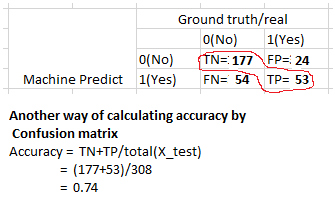

In [27]:
from PIL import Image
Image.open("E:/code/7.MachineLearningOfficial/img/confusion.PNG")

#### Read about confusion matrix: https://en.wikipedia.org/wiki/Confusion_matrix
#### Type 1 and Type 2 Errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors

#### Note: there are two types of errors
- Type 1 Error: patient is suffering with diabetes but machine is showing negative(FP)
- Type 2 Error: patient is not suffering with diabetes but machine is showing positive(FN)


### Classification Report: the estimator working good towards what label?
- `Precision:` When it predicts yes, how often is it correct? When it predicts No, how often is it correct? 

    - Precision = TN/(TN+FN) (a.k.a actual NO)    = 174/210=0.828
    - Precision = TP/(FP+TP)(a.k.a actual yes) = 66/98=0.67
    
    
- `True Positive Rate/Sensitivity/Recall`: When it's actually yes, how often does it predict yes? or When it's actually no, how often does it predict no?

    - TN/(TN+FP)(aka predicted No) = 174/(174+32)=0.84
    - TP/(TP+FN)(aka predicted yes) = 66/(36+66)=0.647
    
    
- `F Score:` This is a weighted average of the true positive rate (recall) and precision	

    - $F1_{score} = \frac {(2 * precision * recall)}{(precision + recall)}$  
    
- `Support:` 
    - Actual No label patients count =174 + 32 = 206
    - Actual Yes label patients count =36+66 = 102


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       201
           1       0.72      0.49      0.58       107

    accuracy                           0.76       308
   macro avg       0.74      0.69      0.70       308
weighted avg       0.75      0.76      0.74       308



### ROC Curve
- Receiver Operating Characteristic(ROC) Curve
- The ROC curve is created by plotting the true positive rate (TPR)/sensitivity against the false positive rate (FPR) at various threshold settings
- In machine learning The true-positive rate is also known as sensitivity, recall or probability of detection Linear regression
- The false-positive rate is also known as the fall-out or probability of `False` alarm

#### Read about ROC Curve:https://en.wikipedia.org/wiki/Receiver_operating_characteristic


#### roc_curve?
    - Compute Receiver operating characteristic (ROC)
    - Note: this implementation is restricted to the binary classification task.

- Parameters
----------

y_true : array, shape = [n_samples]
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array, shape = [n_samples]
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).
    
- Returns
-------
fpr : array, shape = [>2]
    Increasing false positive rates such that element i is the false
    positive rate of predictions with score >= thresholds[i].

tpr : array, shape = [>2]
    Increasing true positive rates such that element i is the true
    positive rate of predictions with score >= thresholds[i].

thresholds : array, shape = [n_thresholds]
    Decreasing thresholds on the decision function used to compute
    fpr and tpr. `thresholds[0]` represents no instances being predicted
    and is arbitrarily set to `max(y_score) + 1`.

In [29]:
y_test[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [30]:
# Compute predicted probabilities of positive class: y_score

y_score = log_model.predict_proba(X_test)[:,1]
y_score[:10]

array([0.38474823, 0.89034233, 0.26918114, 0.1629518 , 0.17840231,
       0.20336569, 0.0878586 , 0.29739899, 0.48131023, 0.38487065])

In [31]:
# Generate ROC curve values: fpr, tpr, thresholds
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score)

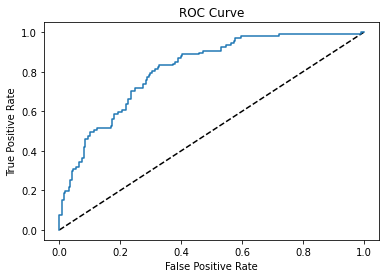

In [32]:
# Plot ROC curve
import matplotlib.pyplot as plt 

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### AUC computation

In [33]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_score)))

AUC: 0.8128516297019575


In [34]:
accuracy_score(y_test,y_test_pred)

0.7564935064935064

In [35]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(log_model, X, y, cv=5, scoring='roc_auc')
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81981481 0.86622642 0.85037736]


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

## Hyperparameter tuning with GridSearchCV

In [36]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(log_model, param_grid, cv=5)
# Fit it to the data
logreg_cv.fit(X, y)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refi

In [37]:
# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7721354166666666


**Home Work:** 
#### With one more dataset: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#### write own code for logistic regression: https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

In [38]:
# after doing above home work,you need to answer
## Balanced Vs Unbalanced Data
### How to convert unbalanced data into balanced
#### oversampling
#### Under Sampling
##### smote